In [1]:
#import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load the training and testing data, scale it into the range [0, 1],
# then reshape the design matrix
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))



[INFO] loading CIFAR-10 data...
170498071/170498071 [==============================] - 3s 0us/step


In [3]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]

In [4]:
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [7]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=10, batch_size=32)

[INFO] training network...
Epoch 1/10
1563/1563 [==============================] - 53s 32ms/step - loss: 0.4352 - accuracy: 0.8551 - val_loss: 1.6170 - val_accuracy: 0.5345
Epoch 2/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.4173 - accuracy: 0.8623 - val_loss: 1.5722 - val_accuracy: 0.5540
Epoch 3/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.4041 - accuracy: 0.8670 - val_loss: 1.7092 - val_accuracy: 0.5246
Epoch 4/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.3874 - accuracy: 0.8731 - val_loss: 1.6647 - val_accuracy: 0.5445
Epoch 5/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.3690 - accuracy: 0.8795 - val_loss: 1.6224 - val_accuracy: 0.5591
Epoch 6/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.3542 - accuracy: 0.8850 - val_loss: 1.6275 - val_accuracy: 0.5575
Epoch 7/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.3419 - accuracy: 

In [8]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
313/313 [==============================] - 4s 11ms/step
              precision    recall  f1-score   support

    airplane       0.75      0.38      0.50      1000
  automobile       0.73      0.61      0.66      1000
        bird       0.27      0.67      0.38      1000
         cat       0.40      0.35      0.37      1000
        deer       0.43      0.50      0.46      1000
         dog       0.45      0.48      0.47      1000
        frog       0.72      0.43      0.54      1000
       horse       0.72      0.48      0.58      1000
        ship       0.71      0.65      0.68      1000
       truck       0.63      0.56      0.59      1000

    accuracy                           0.51     10000
   macro avg       0.58      0.51      0.52     10000
weighted avg       0.58      0.51      0.52     10000



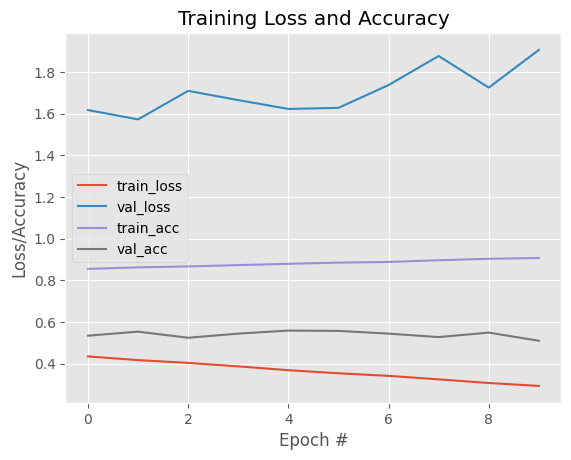

In [12]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 10), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()